In [1]:
subj = "Subj1"
exp = "exp1"

### Imports

In [2]:
%load_ext autoreload
%autoreload 2

import SDA
import SDA.analytics
import SDA.clustquality
import SDA.stageprocess

import mne
import numpy
import pandas

pandas.set_option("display.precision", 2)

### Data

In [3]:
epochs = mne.read_epochs(f"{subj}/src/epochs_filt_rr-epo.fif")
df_features = pandas.read_feather(f"{subj}/{exp}/features.feather")
features = df_features.to_numpy()
print('Features: ', features.shape)

Reading d:\HSE\year-3\HSE\CourseProject\Subj1\src\epochs_filt_rr-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
Features:  (1046, 3)


### SDA

In [4]:
result, df_st_edges = SDA.SDA().apply(features)

Applying to 1046 samples with 3 features each
Running stage 1


  0%|          | 0/589 [00:00<?, ?it/s]

Running stage 2


  0%|          | 0/672 [00:00<?, ?it/s]

In [5]:
result.to_csv(f"{subj}/{exp}/result.csv")
df_st_edges.to_csv(f"{subj}/{exp}/df_st_edges.csv")

### Analysis

#### Find best result

In [6]:
results = SDA.analytics.best_results(result, key = 'Avg-Silh')
results.to_csv(f"{subj}/{exp}/results.csv")
display(results)

,St_len_min,K_nb_max,N_cl_max,N_stages,Cl_cen,St_edges,Ward_dist,Cen_dist,Silh,Cal-Har,Dav-Bold,Avg-Silh,Avg-Cal-Har,Avg-Dav-Bold
1,0,35,10,3,Mode,"[0, 52, 1044, 1046]",160.05,2.20,0.08,99.88,0.82,0.28,99.46,0.79
76,40,35,15,4,Mode,"[0, 52, 558, 681, 1046]",162.17,1.48,-0.02,126.34,2.72,0.22,117.90,1.62
72,40,35,10,5,Median,"[0, 52, 244, 532, 681, 1046]",91.30,1.05,-0.04,128.23,4.43,0.17,79.80,2.03
7,0,35,20,6,Mode,"[0, 52, 245, 560, 681, 1044, 1046]",81.87,1.25,-0.11,107.38,4.45,0.19,70.32,1.62
4,0,35,15,7,Mode,"[0, 52, 245, 558, 681, 846, 1044, 1046]",76.34,1.15,-0.12,95.30,3.75,0.16,65.14,1.87
6,0,35,20,8,Median,"[0, 52, 244, 366, 556, 668, 852, 1040, 1046]",57.43,0.88,-0.07,81.99,5.14,0.14,48.02,3.28
7,0,35,20,9,Mode,"[0, 52, 245, 350, 436, 560, 681, 852, 1044, 1046]",49.20,1.00,-0.16,74.72,36.36,0.13,41.44,2.14
4,0,35,15,10,Mode,"[0, 52, 245, 350, 495, 558, 681, 846, 922, 104...",39.79,0.90,-0.15,66.68,7.96,0.12,33.83,4.04
94,40,45,15,11,Mode,"[0, 52, 218, 245, 350, 415, 525, 558, 681, 867...",30.39,0.78,-0.12,62.46,10.86,0.10,25.67,2.97
48,20,40,15,12,Median,"[0, 52, 105, 208, 245, 350, 436, 525, 558, 681...",25.34,0.72,-0.12,58.27,11.47,0.09,21.37,3.39


In [7]:
best_result = SDA.analytics.best_result(result, key = 'Avg-Silh', n_stages = 10)
best_edges = numpy.array(best_result['St_edges'])
numpy.savetxt(f"{subj}/{exp}/best_edges.txt", best_edges, fmt = "%d", newline = ' ')
display(best_edges)

array([   0,   52,  245,  350,  495,  558,  681,  846,  922, 1044, 1046])

#### Edge stats

In [8]:
edge_statistics = SDA.analytics.edge_statistics(features, best_edges)
edge_statistics.to_csv(f"{subj}/{exp}/edge_statistics.csv")
display(edge_statistics)

,Silh,Cal-Har,Dav-Bold,Ward,Centr
0,2.46e-01,89.60,1.04,92.05,1.50
1,2.00e-01,73.17,1.63,79.73,1.08
2,4.06e-02,13.22,3.80,12.16,0.45
3,1.06e-01,19.01,2.75,18.56,0.65
4,9.64e-02,27.95,2.09,42.26,1.01
5,1.71e-01,66.80,1.82,92.97,1.15
6,6.75e-02,11.29,3.87,14.78,0.53
7,-3.58e-03,0.43,18.32,0.69,0.12
8,1.19e-01,3.04,1.04,4.88,1.57


### Feature plots

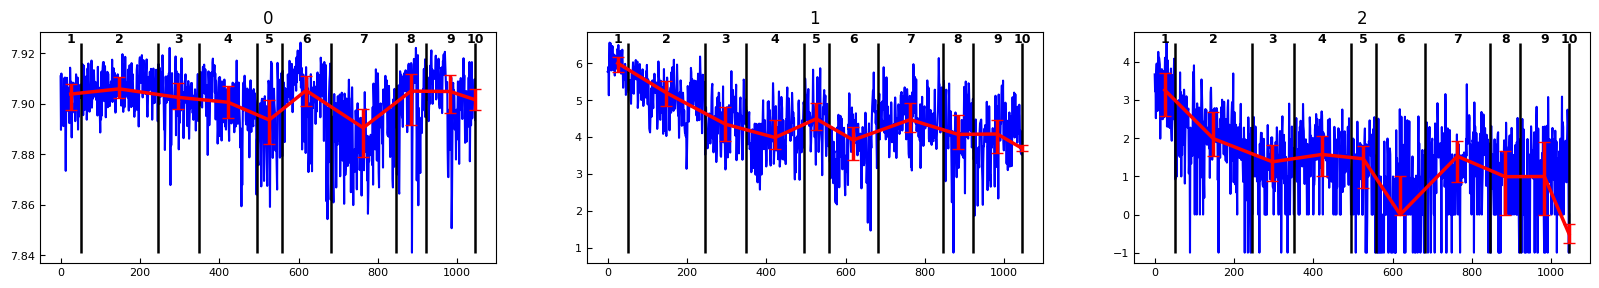

In [9]:
SDA.analytics.plot_features(df_features, best_edges).savefig(f"{subj}/{exp}/features.png")

### Lengths of stages

In [10]:
stage_timing = SDA.analytics.stage_timing(best_edges, epochs)
stage_timing.to_csv(f"{subj}/{exp}/stage_timing.csv")
display(stage_timing)

,0,1,2,3,4,5,6,7,8,9
"Start-end time, sec","(9.9, 55.5)","(56.3, 229.1)","(229.9, 325.9)","(326.7, 457.9)","(458.7, 509.9)","(510.7, 619.5)","(620.3, 762.7)","(763.5, 829.9)","(831.5, 936.3)","(937.1, 938.7)"
"Time length, sec",45.6,172.8,96.0,131.2,51.2,108.8,142.4,66.4,104.8,1.6
Number of epochs,52,193,105,145,63,123,165,76,122,2


### Overall stats

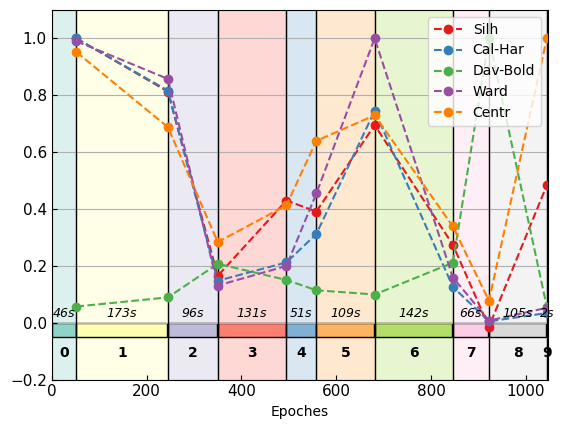

In [11]:
SDA.analytics.plot_stats(features, best_edges, epochs).savefig(f"{subj}/{exp}/stats.png")